In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from scipy.stats import linregress
from citipy import citipy

In [2]:
#Get API key
from config import api_key

In [3]:
#Output file
output_data_file = "output_data/cities.csv"

## Cities List

In [4]:
#Create lists for latitudes and the cities
lat_lg = []
cities = []

#Ranndom latitudes and longitudes 
rand_lat = np.random.uniform(low = -100,high =100, size = 1200)
rand_long = np.random.uniform(low = -150, high = 150, size = 1200)
lat_lg = zip(rand_lat, rand_long)

#adding non duplicated cities
for x in lat_lg:
    city = citipy.nearest_city(x[0], x[1]).city_name
    if city not in cities:
        cities.append(city)

In [5]:
num_cities = len(cities)
num_cities

490

In [6]:
cities_df = pd.DataFrame(cities)
cities_df

,0
0,ushuaia
1,busselton
2,cabo san lucas
3,hithadhoo
4,vanavara
...,...
485,itarema
486,marly
487,turayf
488,verkhoyansk


## Weather Map API

In [7]:
print('Data is being processed')

Data is being processed


In [8]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=metric" 

In [9]:
city_names = []
date = []
country = []
lat = []
lon = []
max_temp = []
hum = []
clouds = []
wind = []


r_count = 1
s_count = 1

for city in cities: 
    
    response = requests.get(f"{url}&q={city}").json()
    print("Processing record %s of Set %s | %s" % (r_count, num_cities, city))
    
    r_count += 1
    
    try: 
        city_names.append(response["name"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        wind.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
    
    except:
        print("City not found. Next city processing...")
        pass

print("--------------------------------------------")
print("Data Retrieval Completed")

Processing record 1 of Set 490 | ushuaia
Processing record 2 of Set 490 | busselton
Processing record 3 of Set 490 | cabo san lucas
Processing record 4 of Set 490 | hithadhoo
Processing record 5 of Set 490 | vanavara
Processing record 6 of Set 490 | tiksi
Processing record 7 of Set 490 | punta arenas
Processing record 8 of Set 490 | quirinopolis
Processing record 9 of Set 490 | longyearbyen
Processing record 10 of Set 490 | port hawkesbury
Processing record 11 of Set 490 | saint-augustin
Processing record 12 of Set 490 | chabahar
Processing record 13 of Set 490 | chuy
Processing record 14 of Set 490 | zyryanovsk
Processing record 15 of Set 490 | hilo
Processing record 16 of Set 490 | porto novo
Processing record 17 of Set 490 | hobart
Processing record 18 of Set 490 | samur
Processing record 19 of Set 490 | tidore
City not found. Next city processing...
Processing record 20 of Set 490 | yellowknife
Processing record 21 of Set 490 | san ramon
Processing record 22 of Set 490 | rikitea
Pr

Processing record 174 of Set 490 | cruden bay
City not found. Next city processing...
Processing record 175 of Set 490 | sisimiut
Processing record 176 of Set 490 | gimli
Processing record 177 of Set 490 | maneciu
Processing record 178 of Set 490 | bolungarvik
City not found. Next city processing...
Processing record 179 of Set 490 | nalut
Processing record 180 of Set 490 | shu
Processing record 181 of Set 490 | marcona
City not found. Next city processing...
Processing record 182 of Set 490 | kodiak
Processing record 183 of Set 490 | barstow
Processing record 184 of Set 490 | tura
Processing record 185 of Set 490 | medicine hat
Processing record 186 of Set 490 | rimini
Processing record 187 of Set 490 | nizhneyansk
City not found. Next city processing...
Processing record 188 of Set 490 | garissa
Processing record 189 of Set 490 | tsihombe
City not found. Next city processing...
Processing record 190 of Set 490 | alekseyevsk
Processing record 191 of Set 490 | vinh
Processing record 19

Processing record 346 of Set 490 | pasco
Processing record 347 of Set 490 | micheweni
Processing record 348 of Set 490 | yanam
Processing record 349 of Set 490 | yantongshan
Processing record 350 of Set 490 | willmar
Processing record 351 of Set 490 | ancud
Processing record 352 of Set 490 | marsabit
Processing record 353 of Set 490 | beloha
Processing record 354 of Set 490 | atambua
Processing record 355 of Set 490 | maarianhamina
Processing record 356 of Set 490 | denpasar
Processing record 357 of Set 490 | yulara
Processing record 358 of Set 490 | huntsville
Processing record 359 of Set 490 | the valley
Processing record 360 of Set 490 | port hardy
Processing record 361 of Set 490 | rio gallegos
Processing record 362 of Set 490 | labuhan
Processing record 363 of Set 490 | naze
Processing record 364 of Set 490 | north branch
Processing record 365 of Set 490 | chapais
Processing record 366 of Set 490 | palmares do sul
Processing record 367 of Set 490 | borogontsy
Processing record 368

In [10]:
weather_df = pd.DataFrame({
    "City": city_names,
    "Country": country,
    "Date": date,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": max_temp,
    "Humidity": hum,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    
})
weather_df

,City,Country,Date,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,1610220991,-54.8000,-68.3000,13.00,47,75,4.63
1,Busselton,AU,1610220986,-33.6500,115.3333,19.44,80,92,2.24
2,Cabo San Lucas,MX,1610221022,22.8909,-109.9124,23.89,46,1,4.12
3,Hithadhoo,MV,1610220743,-0.6000,73.0833,27.09,77,100,5.12
4,Vanavara,RU,1610221503,60.3400,102.2797,-21.90,90,100,2.89
...,...,...,...,...,...,...,...,...,...
448,Itarema,BR,1610221374,-2.9248,-39.9167,28.43,66,9,7.08
449,Marly,FR,1610221592,50.3456,3.5496,0.56,100,90,1.03
450,Turaif,SA,1610221592,31.6725,38.6637,8.00,57,0,4.63
451,Verkhoyansk,RU,1610221592,67.5447,133.3850,-27.14,86,100,1.28


In [11]:
weather_df.to_csv(output_data_file)

## Plotting Data

### Latitude VS Temperature

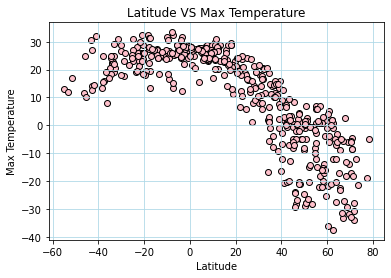

In [12]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp"],edgecolors="black",facecolors="pink")
plt.title("Latitude VS Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightblue")
plt.savefig("output_data/MTemp_Lat.png")
plt.show()

We this sample of data we can conclude that the greatest the latitude the lowest the temperature is. There is also a centralization of temperature between 30 and 20 degrees in a range of -40 to 20 latitude. 

### Latitude VS Cloudiness

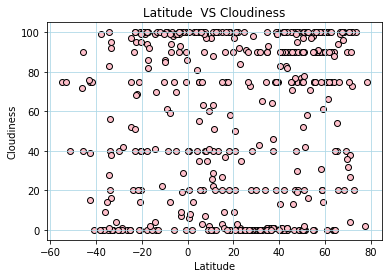

In [13]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],edgecolors="black",facecolors="pink")
plt.title("Latitude  VS Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightblue")
plt.savefig("output_data/Cloudiness_Lat.png")
plt.show()

From the above plot we can conclude there is no relation between latitude and cloudiness.

### Latitude VS Humidity

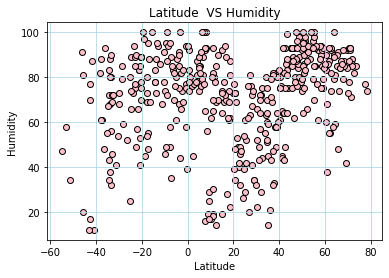

In [14]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],edgecolors="black",facecolors="pink")
plt.title("Latitude  VS Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightblue")
plt.savefig("output_data/Humidity_Lat.png")
plt.show()

From the above plot we can conclude that the greater the latitude the greater it will be the humidity in those cities.

### Latitude VS Wind Speed

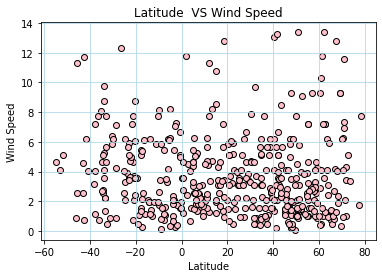

In [15]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors="pink")
plt.title("Latitude  VS Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightblue")
plt.savefig("output_data/WindSpeed_Lat.png")
plt.show()

From the above plot we can conclude the wind speed will be slower in cities with greater latitude.